# Mid-term Project (Linear Regression)

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')


In [2]:
df=pd.read_csv('mpg.csv',na_values='?')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null int64
name            398 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [6]:
#function to correct car-brand names
def brand(x):
    if (x=='chevy' or x== 'chevroelt'):
        return 'chevrolet'
    elif (x=='vw' or x== 'vokswagen' or x=='volkswagen'):
        return 'volkswagen'
    elif x=='maxda':
        return 'mazda'
    elif x=='toyouta':
        return 'toyota'
    elif x=='capri':
        return 'ford'
    elif x=='nissan':
        return 'datsun'
    elif x=='mercedes':
        return 'mercedes-benz'
    
    else:
        return x

In [7]:
df['brand']=df['name'].apply(lambda x:x.split(' ')[0]).apply(brand)

In [8]:
df['brand'].unique()

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac', 'dodge',
       'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi', 'saab', 'bmw',
       'hi', 'mercury', 'opel', 'fiat', 'oldsmobile', 'chrysler', 'mazda',
       'volvo', 'renault', 'honda', 'subaru', 'mercedes-benz', 'cadillac',
       'triumph'], dtype=object)

In [9]:
#checking for null values
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
brand           0
dtype: int64

In [10]:
# Filling Null values by mean 
df.fillna(df['horsepower'].mean(),inplace=True)

# Look at some distributions of the different variables in the data

(array([ 0.    ,  0.0001,  0.0002,  0.0003,  0.0004,  0.0005,  0.0006,
         0.0007,  0.0008]), <a list of 9 Text yticklabel objects>)

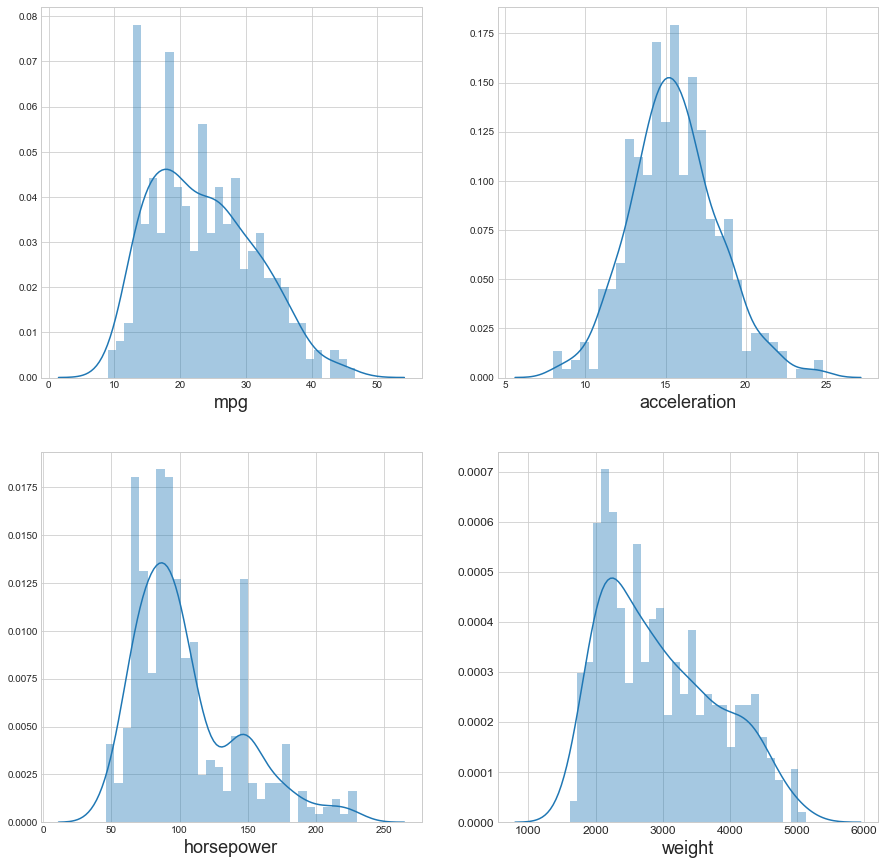

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
sns.distplot(df['mpg'],kde=True,bins=30,ax=axes[0][0])
axes[0][0].set_xlabel("mpg", fontsize=18)

sns.distplot(df['acceleration'],kde=True,bins=30,ax=axes[0][1])
axes[0][1].set_xlabel("acceleration", fontsize=18)

sns.distplot(df['horsepower'],kde=True,bins=30,ax=axes[1][0])
axes[1][0].set_xlabel("horsepower", fontsize=18)

sns.distplot(df['weight'],kde=True,bins=30,ax=axes[1][1])
axes[1][1].set_xlabel("weight", fontsize=18)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

The mpg variable seems somewhat close to being normal, could have done some sort of transformation to get it closer to being normal

As expected there were no 1000 horsepower cars back then

Weight values look like the previous two variables of interest but there is a bit more population as you move towards the bigger values

Acceleration values look as close to a bell curve as you are going to get. I wonder what the units were for these values for acceleration

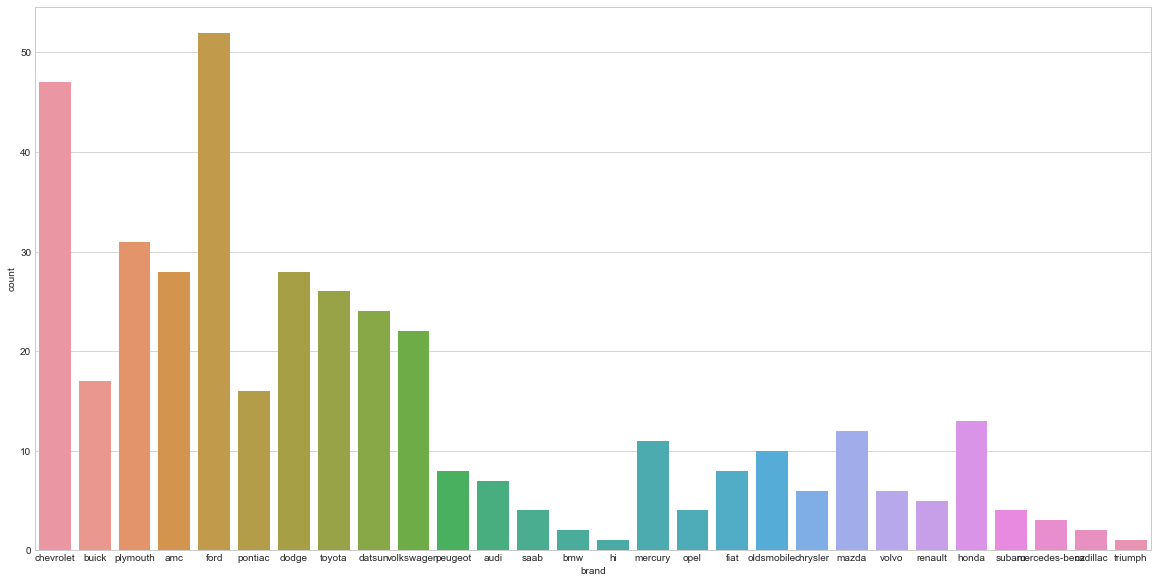

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(df['brand'])

Ford has the most vehicles in the data followed by Chevy. Seems like there is plenty of representation for the common brands in the data set and little of the luxury brands like BMW, Cadillac and Mercedes Most cars were 4 cylinder cars which is no surprise considering the era the data came from

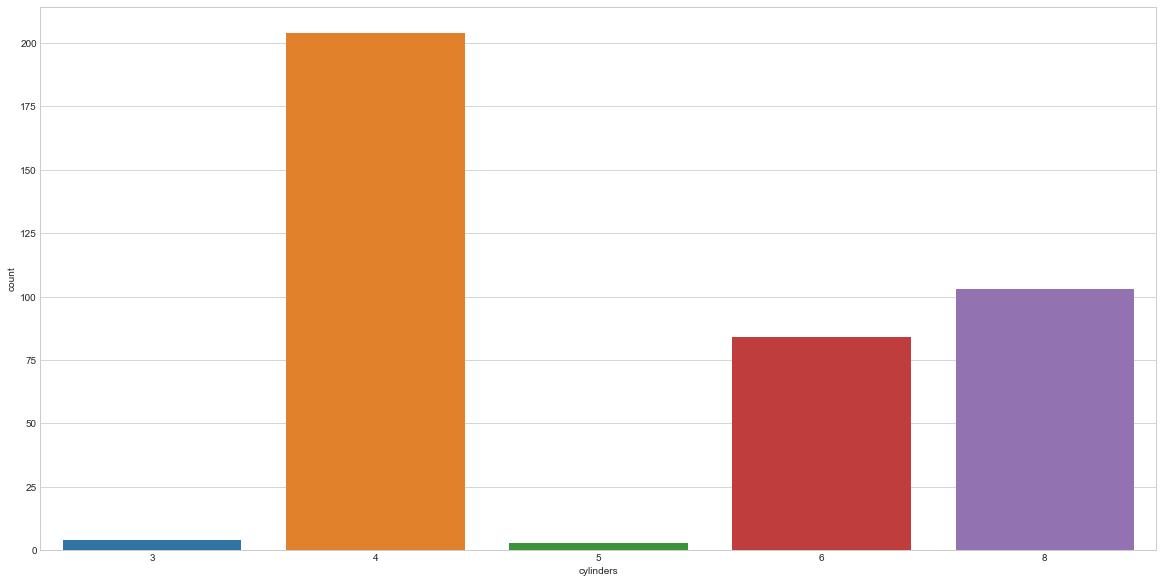

In [13]:
plt.figure(figsize=(20,10))
sns.countplot(df['cylinders'])

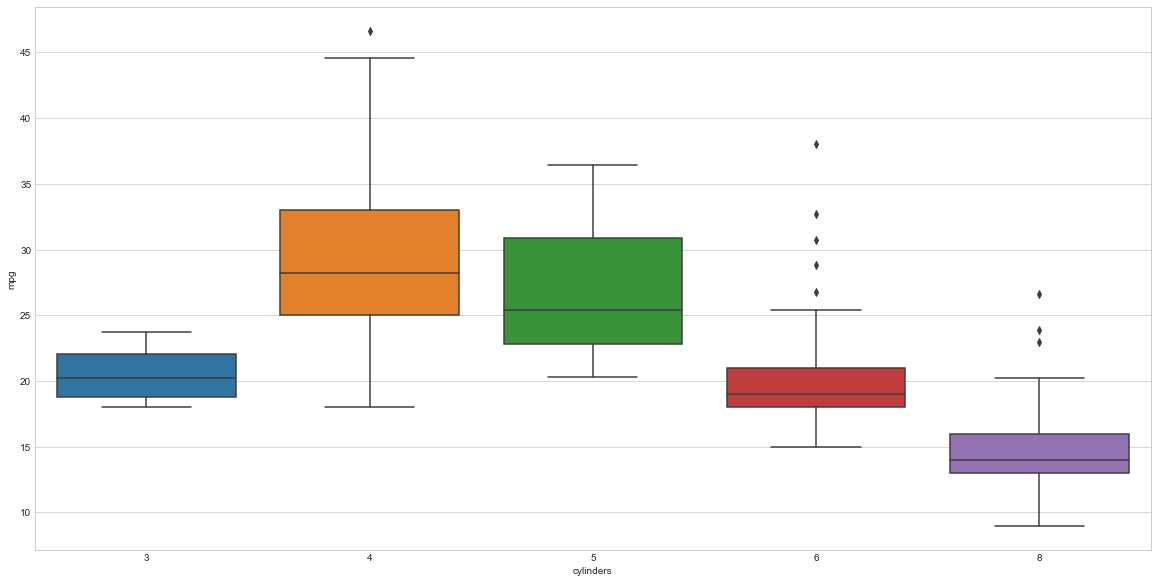

In [14]:
plt.figure(figsize=(20,10))
sns.boxplot(x='cylinders',y='mpg',data=df)

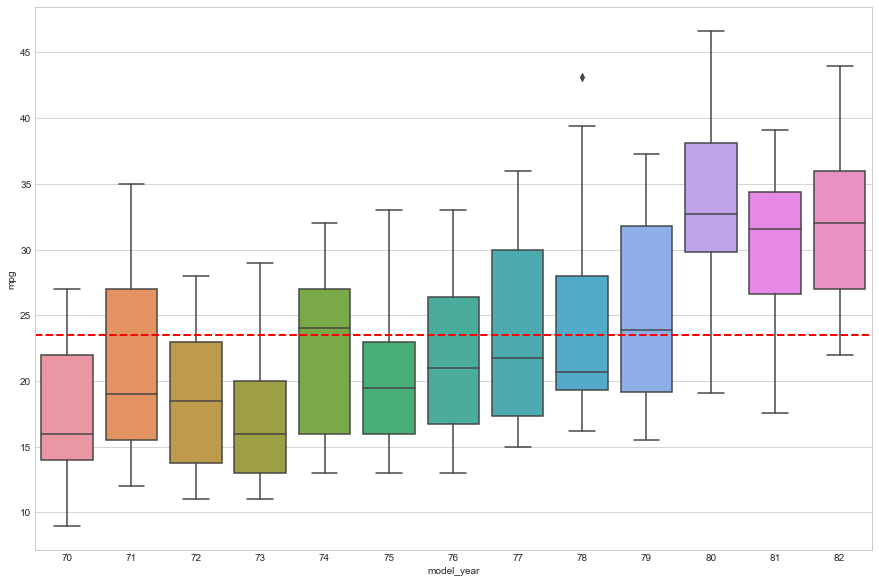

In [15]:

f, ax = plt.subplots(figsize=(15,10))
fig = sns.boxplot(x='model_year', y="mpg", data=df)

plt.axhline(df.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

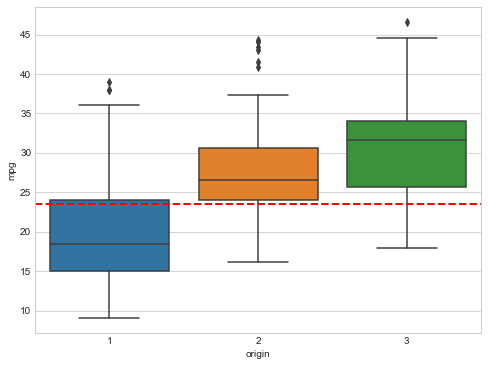

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='origin', y='mpg', data=df)

plt.axhline(df.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

Majority of the cars from USA have MPG below  average.
Majority of the cars from Japan and Europe have MPG above  average.

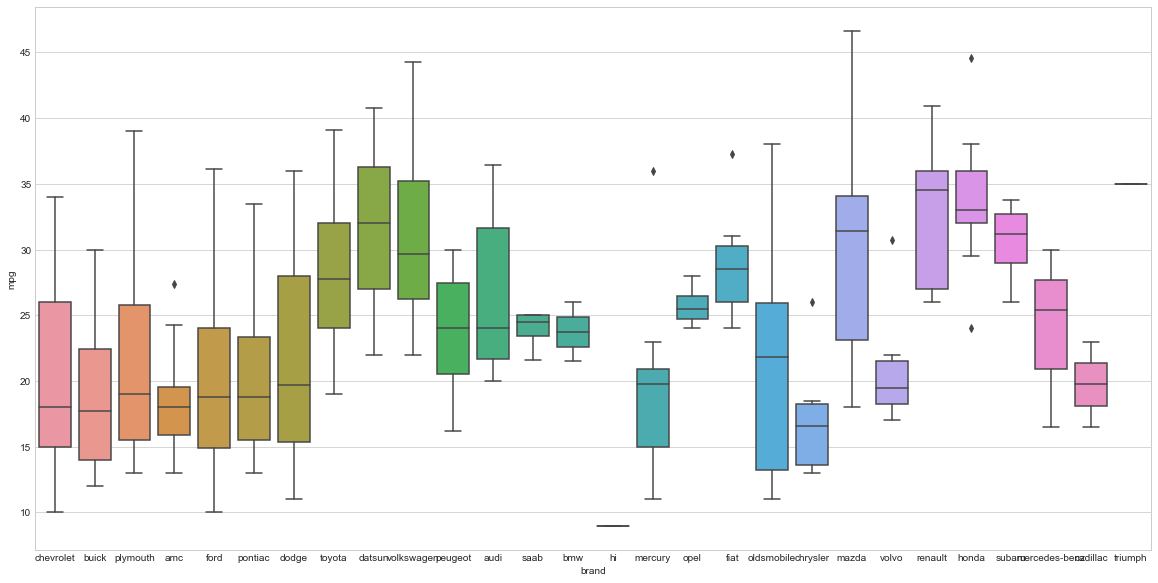

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(x='brand',y='mpg',data=df)

The general trend for the mpg as the number of cylinders increased was down. The more cylinders you had the worse off your mpg was. The best number of cylinders to have seems like 4, 4 cylinders had the best mpg
It seems as if as the years progressed the general mpg values increased too. I am guessing with improved engineering the mpg would have been expected to improve with time.
I am not sure what the corresponding actual names for the places of origin are but it seems like cars that came from region 3 had the best mpg with region 1 having the worst of the three regions

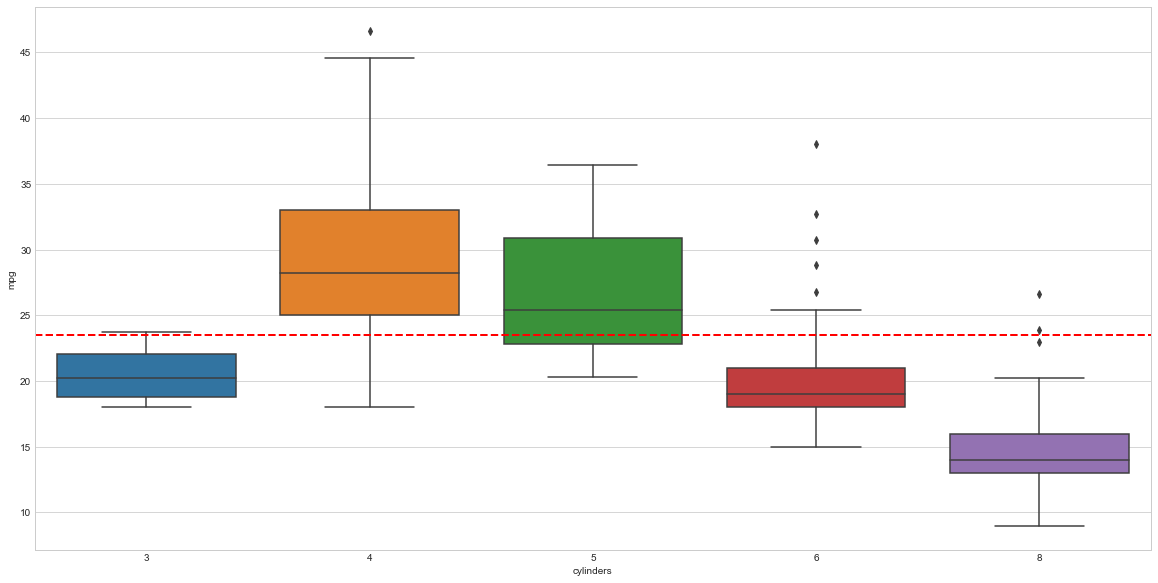

In [18]:
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x='cylinders', y="mpg", data=df)

plt.axhline(df.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

cars having 4 and 5 cylinders have mpg above average.

In [19]:
#changing origin as 1=> USA, 2=> EUROPE and 3+> JAPAN
df['origin']=df['origin'].apply(lambda x: 'USA' if x==1 else('EUROPE' if x==2 else 'JAPAN') )

In [20]:
#getting dummy varaibles for origin column
dummies_origin = pd.get_dummies(df['origin'],drop_first=True)
df = pd.concat([df,dummies_origin],axis=1)

In [21]:
X = df.drop(['mpg','name','brand','acceleration','origin','cylinders'],axis=1)
y = df['mpg']

In [22]:
#Split the data into training set and testing set using train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
#Creating and Training the Mode
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
linreg = lm.fit(X_train, y_train)

print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

R-squared score (training): 0.810
R-squared score (test): 0.845


In [24]:

predictions = lm.predict(X_test)

In [25]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.35090890283
MSE: 8.91065935611
RMSE: 2.98507275558


In [26]:
coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
displacement,0.010465
horsepower,-0.014339
weight,-0.006339
model_year,0.818609
JAPAN,-0.142982
USA,-3.094683


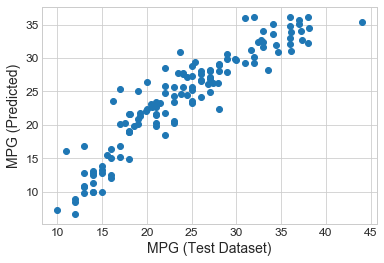

In [27]:
plt.xlabel('MPG (Test Dataset)',fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel('MPG (Predicted)',fontsize=14)
plt.yticks(fontsize=12)
plt.scatter(y_test,predictions)

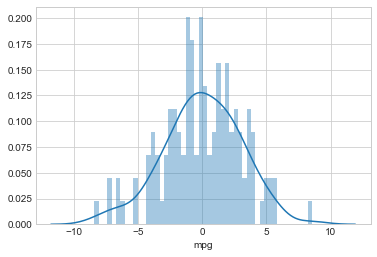

In [28]:
#Residual Histogram
sns.distplot((y_test-predictions),bins=50);

In [29]:

import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [30]:
X_train_1 = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_1)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     184.5
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           1.75e-90
Time:                        13:52:45   Log-Likelihood:                -706.20
No. Observations:                 266   AIC:                             1426.
Df Residuals:                     259   BIC:                             1451.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.4448      5.551     -3.323   

Interpreting the coefficients:

    Holding all other features fixed, a 1 unit increase in displacement is associated with an increase of 0.0105 mpg.
    Holding all other features fixed, a 1 unit increase in horsepower is associated with a decrease of 0.0143 mpg.
    Holding all other features fixed, a 1 unit increase in weight is associated with a decrease of 0.0063 mpg.
    Holding all other features fixed, if car is made in japan then mpg will decrease by 0.14 and if car is made in USA then mpg will decrease by 3.09

